# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

zombie = pd.read_csv(r"C:\Users\johns\Downloads\zombies.csv")
zombie.head()

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN


In [13]:
# Replacing categorical data into numeric for linear regression 
zombie['zombie'].replace(['Human', 'Zombie'],
                        [0, 1], inplace=True)
zombie['sex'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)
zombie['rurality'].replace(['Rural', 'Urban', 'Suburban'],
                        [0, 1, 2], inplace=True)
zombie['food'].replace(['Food', 'No food'],
                        [0, 1], inplace=True)
zombie['medication'].replace(['Medication', 'No medication'],
                        [0, 1], inplace=True)
zombie['tools'].replace(['tools', 'No tools'],
                        [0, 1], inplace=True)
zombie['firstaid'].replace(['First aid supplies', 'No first aid supplies'],
                        [0, 1], inplace=True)
zombie['sanitation'].replace(['Sanitation', 'No sanitation'],
                        [0, 1], inplace=True)
zombie['clothing'].replace(['Clothing'],
                        [0], inplace=True)
zombie['documents'].replace(['Documents'],
                        [0], inplace=True)

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

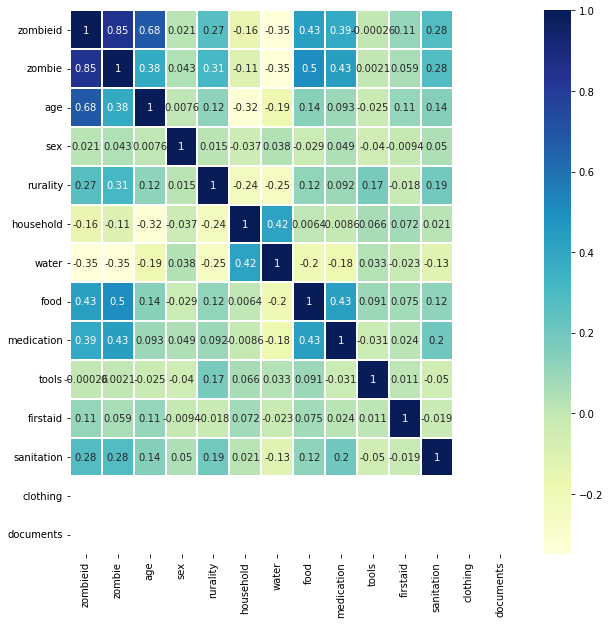

In [15]:
# Heatmap after changing catergorical data to numeric, then adjusted size for better readability 
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(zombie.corr(), cmap="YlGnBu", annot = True, linewidths=.3)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [18]:
x = zombie['zombie']
y = zombie['zombieid']

# creating train and test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# look at x_train
print(x_train)
# look at y_train data set
print(y_train)

74     0
3      0
185    1
26     0
90     0
      ..
87     0
103    0
67     0
24     0
8      0
Name: zombie, Length: 140, dtype: int64
74      75
3        4
185    186
26      27
90      91
      ... 
87      88
103    104
67      68
24      25
8        9
Name: zombieid, Length: 140, dtype: int64


In [19]:
# add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# fit regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# print parameters
lr.params

# print summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               zombieid   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     334.3
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.08e-38
Time:                        21:28:40   Log-Likelihood:                -680.86
No. Observations:                 140   AIC:                             1366.
Df Residuals:                     138   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3667      3.326     17.851      0.000      52.791      65.943
zombie       101.7533      5.565     18.285      0.000      90.750     112.757
==============================================================================
Omnibus:                       21.750   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.972
Skew:                           0.081   Prob(JB):                       0.0505
Kurtosis:                       2.001   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

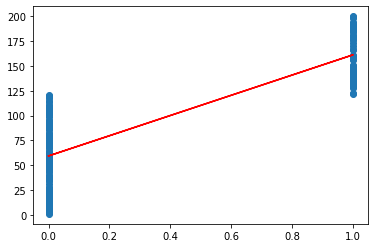

In [20]:
# Visualize using regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 59.3667 + 101.7533*x_train, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.708
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? No, I only had two different point to work with so it was pretty much a stright line. 